In [19]:
import os, json
import numpy as np

count = 0
lst = []
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        initial_prompt = list(data[k]["initial_prompt"].keys())[0]
        optimized_prompt = list(data[k]["optimized_prompt"].keys())[0]
                
        delta = optimized_prompt_score - initial_prompt_score
        # NOTE: 5 prompts misclassified as improved. Although delta > 0, the initial prompt == optimized prompt.
        if initial_prompt == optimized_prompt and delta > 0:
            count += 1
            lst.append(k)
        
        # if delta <= 0:
        #     count += 1
        #     lst.append(k)

assert count == len(lst)
count, lst

(5,
 ["You are a very smart chemistry professor. Answer the student's question concisely and clearly \\ \nIf you do not know the answer, say so.\n\nHere is a question:\n{input}",
  'Summarize this for a second-grade student:\n\nPLACEHOLDER',
  'Create a blog post using the following summary:\n\nPLACEHOLDER\n\nBlog post:',
  'PLACEHOLDER your unique perspective guide your decisions.',
  'Now do the same procedure on following sentence: PLACEHOLDER'])

In [8]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[2.857142857142861, 11.42857142857143, 25.714285714285708, 0.0, 8.57142857142857, 1.4285714285714164, 51.42857142857143, 2.857142857142861, 0.0, 0.0, 0.0, 2.857142857142861, 14.285714285714292, 0.0, 4.285714285714278, 31.42857142857143, 8.57142857142857, 0.0, 0.0, 44.28571428571428, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4285714285714448, 12.857142857142875, 38.57142857142858, 7.142857142857139, 1.4285714285714448, 1.4285714285714164, 21.42857142857143, 0.0, 0.0, 0.0, 0.0, 2.857142857142861, 7.142857142857139, 3.030303030303031, 4.285714285714278, 0.0, 14.285714285714292, 34.285714285714285, 0.0, 9.999999999999998, 10.0, -2.857142857142861, 0.0, -4.285714285714278, 0.0, 22.85714285714287, 22.857142857142875, 0.0, 35.71428571428572, 0.0, 41.42857142857143, 0.0, 7.142857142857153, 0.0, 4.285714285714278, 28.57142857142857, 1.4285714285714448, -2.857142857142861, 0.0, 12.857142857142875, 1.4285714285714164, 0.0, -4.285714285714306, 45.714285714285715, 18.57142857142857, 0.0, 7.1428571428571

In [3]:
temp = np.array(deltas)
print(f"Number of prompts that worsened: {len(temp[temp < 0])}")
print(f"Number of prompts that improved: {len(temp[temp > 0])}")
print(f"Number of prompts that stayed the same: {len(temp[temp == 0])}")


Number of prompts that worsened: 6
Number of prompts that improved: 55
Number of prompts that stayed the same: 38


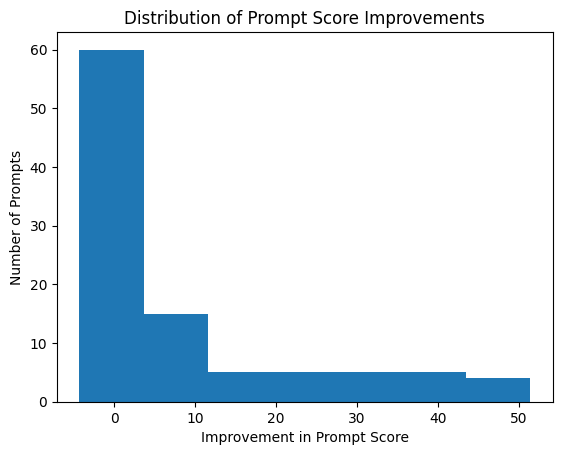

In [4]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

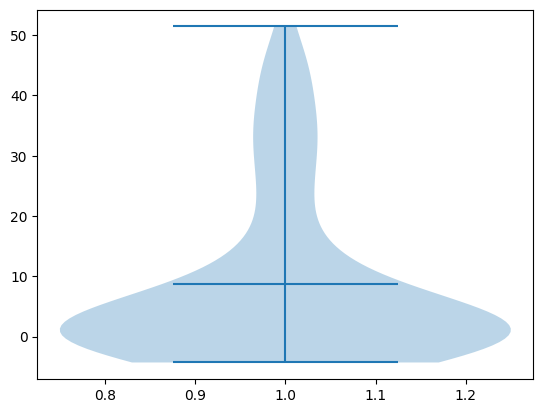

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

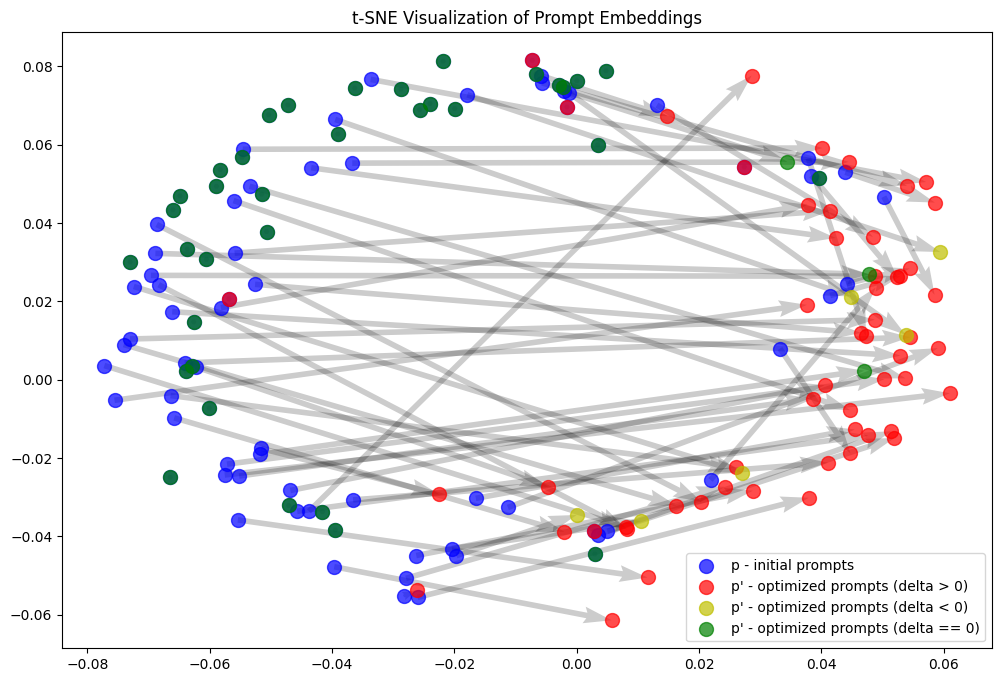

In [107]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np
import json

initial_prompts = []
optimized_prompts = []
prompt_deltas = []

with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    for k in data:
        initial_prompt = list(data[k]["initial_prompt"].keys())[0]
        optimized_prompt = list(data[k]["optimized_prompt"].keys())[0]
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        initial_prompts.append(initial_prompt)
        optimized_prompts.append(optimized_prompt)
        prompt_deltas.append(delta)

assert len(initial_prompts) == len(optimized_prompts) == len(prompt_deltas)

# Generate embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
encodings = model.encode(initial_prompts + optimized_prompts, show_progress_bar=True)

# Numpy-fy the deltas for easier manipulation
prompt_deltas = np.array(prompt_deltas)

for i in range(98, 99):
    # Reduce dimensionality with a fixed random seed
    tsne = TSNE(n_components=2, perplexity=len(encodings) - 1, random_state=i)
    embeddings_reduced = tsne.fit_transform(encodings)
    initial_embeddings_reduced = embeddings_reduced[: len(initial_prompts)]
    optimized_embeddings_reduced = embeddings_reduced[len(initial_prompts) :]

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot initial prompts
    x_coords_initial = initial_embeddings_reduced[:, 0]
    y_coords_initial = initial_embeddings_reduced[:, 1]

    # Plot optimized prompts
    x_coords_optimized = optimized_embeddings_reduced[:, 0]
    y_coords_optimized = optimized_embeddings_reduced[:, 1]

    # Calculate the differences between initial and optimized coordinates
    dx = x_coords_optimized - x_coords_initial
    dy = y_coords_optimized - y_coords_initial

    # Create a quiver plot
    plt.quiver(
        x_coords_initial,
        y_coords_initial,
        dx,
        dy,
        angles="xy",
        scale_units="xy",
        scale=1,
        color="black",
        alpha=0.2,
    )

    # Plot initial prompts
    plt.scatter(
        x_coords_initial,
        y_coords_initial,
        color="b",
        alpha=0.7,
        label="p - initial prompts",
        s=100,
    )

    # Plot optimized prompts with delta > 0
    plt.scatter(
        x_coords_optimized[prompt_deltas > 0],
        y_coords_optimized[prompt_deltas > 0],
        color="r",
        alpha=0.7,
        label="p' - optimized prompts (delta > 0)",
        s=100,
    )
    
    # Plot optimized prompts with delta < 0
    plt.scatter(
        x_coords_optimized[prompt_deltas < 0],
        y_coords_optimized[prompt_deltas < 0],
        color="y",
        alpha=0.7,
        label="p' - optimized prompts (delta < 0)",
        s=100,
    )
    
    # Plot optimized prompts with delta == 0
    plt.scatter(
        x_coords_optimized[prompt_deltas == 0],
        y_coords_optimized[prompt_deltas == 0],
        color="g",
        alpha=0.7,
        label="p' - optimized prompts (delta == 0)",
        s=100,
    )

    plt.title(f"t-SNE Visualization of Prompt Embeddings")
    plt.legend(loc='best')
    plt.show()

In [112]:
import pandas as pd

# Convert initial and optimized prompts to a DataFrame
df = pd.DataFrame(
    {
        "Initial Prompt": np.array(initial_prompts)[prompt_deltas > 0],
        "Optimized Prompt": np.array(optimized_prompts)[prompt_deltas > 0],
        "Delta": prompt_deltas[prompt_deltas > 0]
    }
)

df.to_csv("prompts_optimized.csv", index=False)